# Mother machine simulations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

In [3]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.15,
    cell_max_length=6.65, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 300,
    pix_mic_conv = 0.065,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.,
    width_var = 0.,
    lysis_p = 0.00,
    save_dir="/tmp/test/",
    resize_amount = 3
)

In [5]:
my_simulation.run_simulation(show_window=True)

/home/georgeos/Documents/SyMBac/SyMBac/simulation.py:121: UserWarning: You are using show_window = True. If you re-run the simulation (even by re-creating the Simulation object), then for reasons which I do not understand, the state of the simulation is not reset. Restart your notebook or interpreter to re-run simulations.
  warnings.warn("You are using show_window = True. If you re-run the simulation (even by re-creating the Simulation object), then for reasons which I do not understand, the state of the simulation is not reset. Restart your notebook or interpreter to re-run simulations.")


In [7]:
from SyMBac.lineage import Lineage

In [8]:
my_lineage = Lineage(my_simulation)

In [9]:
my_lineage.temporal_lineage_graph

In [10]:
my_lineage.family_tree_graph

In [11]:
my_lineage.plot_family_tree()

ImportError: requires pygraphviz http://pygraphviz.github.io/

This method takes two arguments. 

- *do_transformation* - Whether or not to bend or morph the cells to increase realism.
- *label_masks* - This controls whether the output training masks will be binary or labeled. Binary masks are used to train U-net (e.g DeLTA), wheras labeled masks are used to train Omnipose

In [12]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Extracting cell properties from the simulation:   0%|          | 0/298 [00:00<?, ?it/s]

Rendering cell optical path lengths:   0%|          | 0/298 [00:00<?, ?it/s]

In [13]:
my_simulation.visualise_in_napari()

/home/georgeos/miniconda3/envs/symbac/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


## Point spread function (PSF) generation

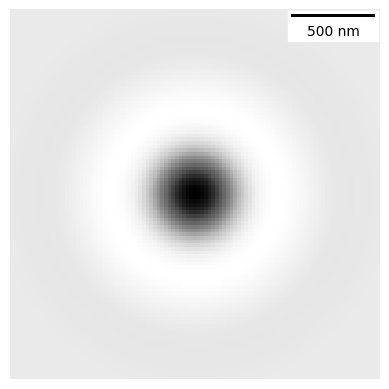

In [38]:
# A phase contrast kernel
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.2, 
    n = 1.3, 
    resize_amount = 3, 
    pix_mic_conv = 0.065, 
    apo_sigma = 20, 
    mode="phase contrast", 
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

## Camera model

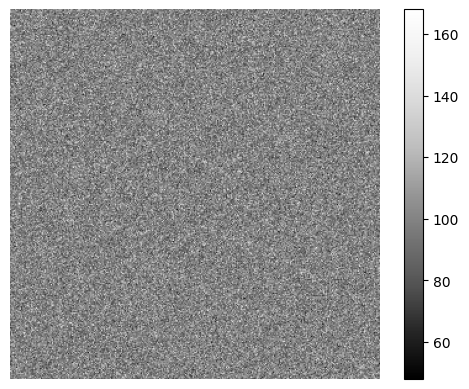

In [39]:
my_camera = Camera(baseline=100, sensitivity=2.9, dark_noise=8)
my_camera.render_dark_image(size=(300,300));

In [40]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image, camera = my_camera, additional_real_images = [real_image])

3 (1404, 188)


Next we shall extract some pixels from the real image which we will use to optimise the synthetic image. We will extract the pixel intensities and variances from the 3 important regions of the image. The cells, the device, and the media. These are the same three aforementioned intensities for which we “guessed” some parameters in the previous code block.

We use napari to load the real image, and create three layers above it, called `media_label`, `cell_label`, and `device_label`. We will then select each layer and draw over the relevant regions of the image.

A video below shows how it's done:

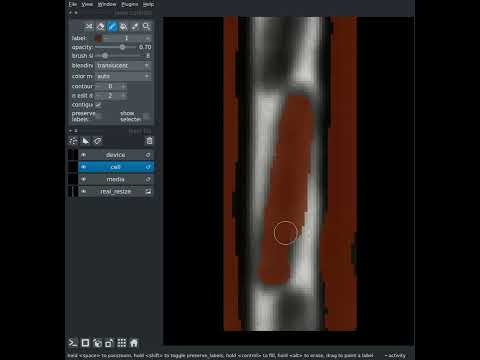

In [41]:
from IPython.display import YouTubeVideo
YouTubeVideo("sPC3nV_5DfM")

In [42]:
my_renderer.select_intensity_napari()

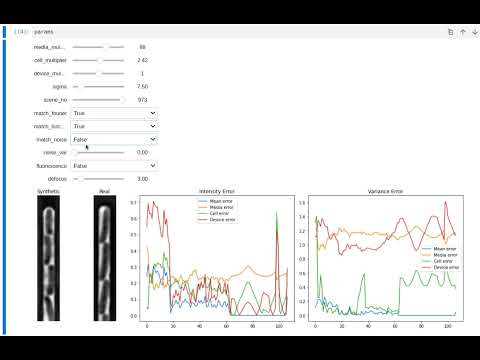

In [43]:
YouTubeVideo("PeeyotMQAQU")

In [44]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=75, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [49]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=True, randomise_noise_match=True,  burn_in=40, n_samples = 300, save_dir="/home/gh464/symbac_test_output/", in_series=True, prefix="videotest")

Rendering synthetic images: 0it [00:00, ?it/s]